# Household EDA on OpenSAFELY dummy data

Python code for pulling in the full-sized dummy data and running EDA relevant to household analysis

Output is a set of figures and log for checking


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
logging.basicConfig(filename='./output.log', level=logging.INFO, format='%(asctime)s %(message)s')
logging.info('Libraries imported and logging started')

In [3]:
# This is a standard extract from the server, with a couple of do-files to manipulate the data

df = pd.read_stata("../hh_analysis_datasetALLVARS.dta", columns=["hh_id", "age", "case"])

In [4]:
logging.info('Data Read In')

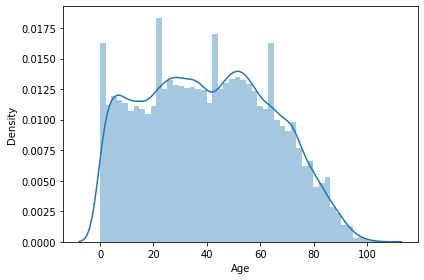

In [5]:
# Visualise the age distribution in the samples

plt.figure(figsize=(6,4))
sns.distplot(df.age.values)
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('./ages.png')

In [6]:
logging.info('Age figure plotted')

In [7]:
positives = df[df.case == 1].groupby("hh_id").count()["case"].to_frame()
totals = df.groupby("hh_id").count()["case"].to_frame()
totals.columns = ["total_size"]
counts_for_charts = totals.join(positives, how="left").fillna(0)
counts_for_charts.head()

,total_size,case
hh_id,,
235,1,0.0
245,1,0.0
257,1,0.0
267,1,1.0
273,1,1.0


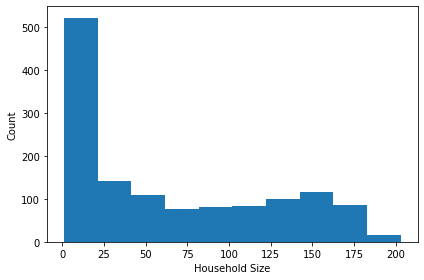

In [8]:
# Check the distribution of household sizes

counts_for_charts
plt.figure(figsize=(6,4))
plt.hist(counts_for_charts.total_size)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./hh_sizes.png')

In [9]:
logging.info('Household size figure plotted')

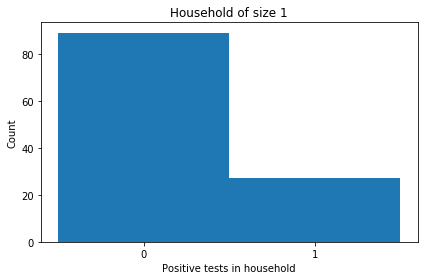

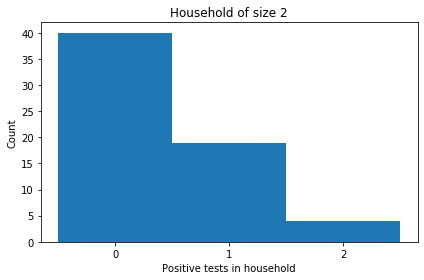

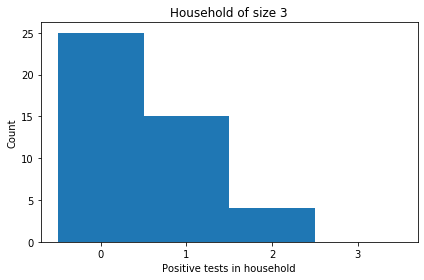

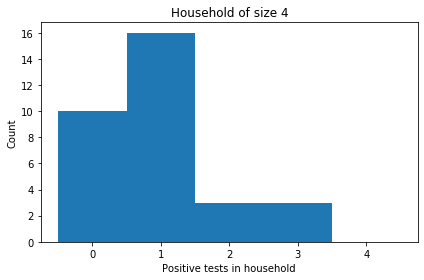

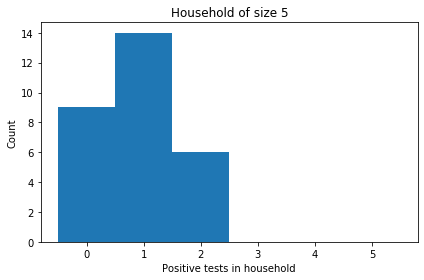

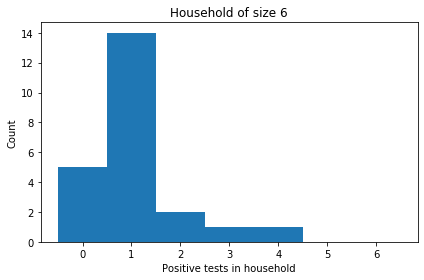

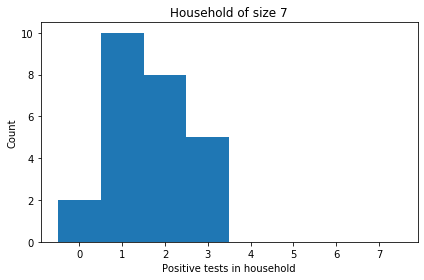

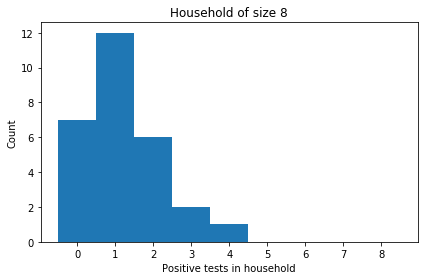

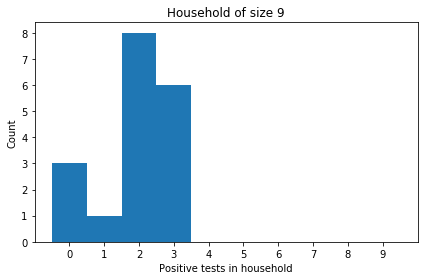

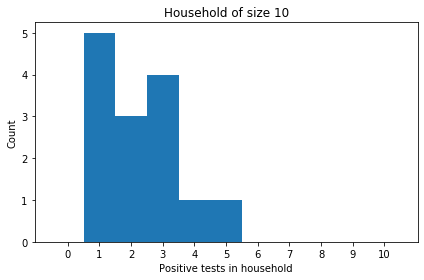

In [10]:
# Look at the distribution of cases in households by size

max_household_size = 10
for nhsize in range(1,max_household_size + 1):
    households = counts_for_charts[counts_for_charts.total_size == nhsize]
    plt.figure(figsize=(6,4))
    plt.title("Household of size %s" % nhsize)
    plt.hist(households.case, bins=range(nhsize+2), align="left")
    plt.xticks(range(nhsize+1))
    plt.xlabel('Positive tests in household')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig('./hh_cases_' + str(nhsize) + '.png')

In [11]:
logging.info('Household cases figures plotted')